<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

You have an equity portfolio that has a payoff structure shown in this excel file Test 1 Portfolio Surgery.xlsxPreview the document  

The payoff is dependent on the SPY index on which many options are available. Use both call and put options to reduce the negative payoffs as best as possible. Use options with strikes from \$100 to \$390 with increments of 10.

Upload your code (Python, Matlab, R, C, or any other) and also a picture that shows the payoffs before and after surgery. You may use the code (Matlab and Python) available on canvas and adapt it suitably.

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
# stock is the possible stock price space
stock = np.arange(1,101)

In [13]:
# Then call and put are the possible call and put payments space
call = np.maximum(stock - np.transpose([5*np.arange(1,21)]), 0)
put = np.maximum(-stock + np.transpose([5*np.arange(1,21)]), 0)

In [11]:
various_strikes = np.transpose([5*np.arange(1,21)])
various_strikes

array([[  5],
       [ 10],
       [ 15],
       [ 20],
       [ 25],
       [ 30],
       [ 35],
       [ 40],
       [ 45],
       [ 50],
       [ 55],
       [ 60],
       [ 65],
       [ 70],
       [ 75],
       [ 80],
       [ 85],
       [ 90],
       [ 95],
       [100]])

In [6]:
call

array([[ 0,  0,  0, ..., 93, 94, 95],
       [ 0,  0,  0, ..., 88, 89, 90],
       [ 0,  0,  0, ..., 83, 84, 85],
       ...,
       [ 0,  0,  0, ...,  8,  9, 10],
       [ 0,  0,  0, ...,  3,  4,  5],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [7]:
put

array([[ 4,  3,  2, ...,  0,  0,  0],
       [ 9,  8,  7, ...,  0,  0,  0],
       [14, 13, 12, ...,  0,  0,  0],
       ...,
       [89, 88, 87, ...,  0,  0,  0],
       [94, 93, 92, ...,  0,  0,  0],
       [99, 98, 97, ...,  2,  1,  0]])

In [24]:
# import portfolio data
# use your own file path to replace
# file_path = r"C://Users/26529/Desktop/XiaoyuDu world/6 Georgia tech QCF/1 Gatech Courses/Semester 4/7 Derivatives/MATLAB_Python/portfolio_surgery_code/Piecewise Linear Approximation Data.xlsx"
file_path = r"Piecewise Linear Approximation Data.xlsx"
portfolio_dataframe = pd.read_excel(file_path)
portfolio = portfolio_dataframe

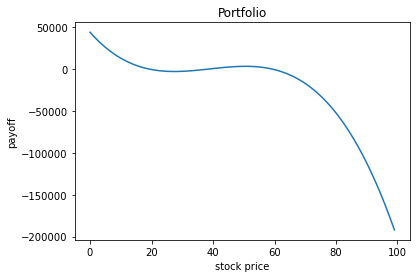

In [23]:
plt.plot(portfolio['Portfolio 1'])
plt.title('Portfolio')
plt.xlabel('stock price')
plt.ylabel('payoff')
plt.show()

In [15]:
# plot call and put
call, put = np.transpose(call), np.transpose(put)

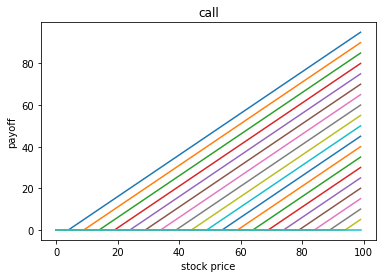

In [16]:
plt.plot(call)
plt.title('call')
plt.xlabel('stock price')
plt.ylabel('payoff')
plt.show()

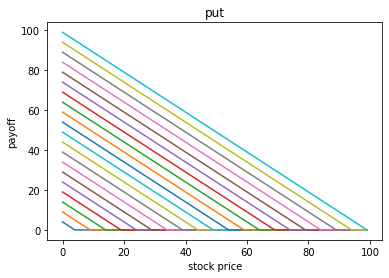

In [17]:
plt.plot(put)
plt.title('put')
plt.xlabel('stock price')
plt.ylabel('payoff')
plt.show()

In [20]:
# x is the independent variable, axis = 1 means concat 
x = np.concatenate((call, put), axis=1)

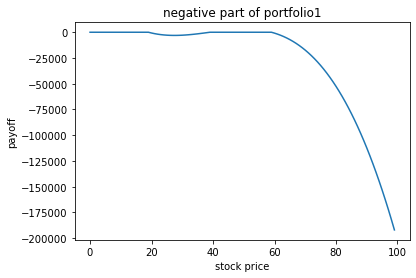

In [25]:
negative_portfolio1 = np.minimum(portfolio['Portfolio 1'], 0)
plt.plot(negative_portfolio1)
plt.title("negative part of portfolio1")
plt.xlabel('stock price')
plt.ylabel('payoff')
plt.show()

Text(0.5, 1.0, 'Regression coefficient')

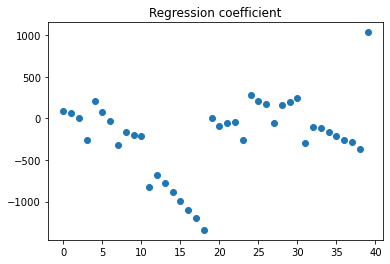

In [28]:
model = LinearRegression(fit_intercept=False)
beta = model.fit(x, negative_portfolio1.values).coef_
plt.scatter(list(range(len(beta))), beta)
plt.title('Regression coefficient')

In [29]:
aftersurgery = negative_portfolio1 - np.dot(x,beta)

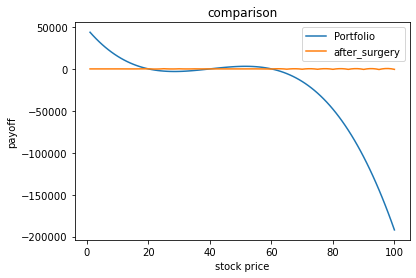

In [30]:
plt.plot(stock,portfolio['Portfolio 1'])
plt.plot(stock, aftersurgery)
plt.xlabel('stock price')
plt.ylabel('payoff')
plt.legend(["Portfolio","after_surgery"])
plt.title("comparison")
plt.show()

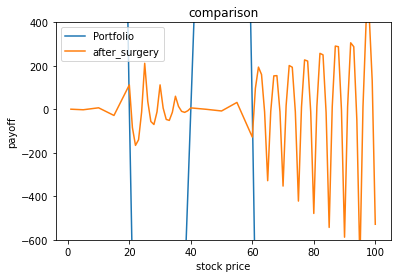

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(stock,portfolio['Portfolio 1'])
ax.plot(stock, aftersurgery)
ax.set_ylim(-600, 400)
plt.xlabel('stock price')
plt.ylabel('payoff')
ax.legend(["Portfolio","after_surgery"])
plt.title("comparison")
plt.show()

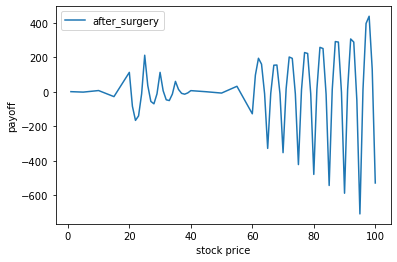

In [145]:
plt.plot(stock, aftersurgery)
plt.xlabel('stock price')
plt.ylabel('payoff')
plt.legend(["after_surgery"])
plt.show()

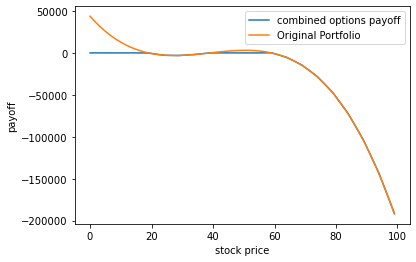

In [42]:
option_payoff = np.dot(x,beta)
plt.xlabel('stock price')
plt.ylabel('payoff')
plt.plot(option_payoff)
plt.plot(portfolio_dataframe['Portfolio 1'])
plt.legend(["combined options payoff","Original Portfolio"])
plt.show()